In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
x=np.arange(-5.0,5.0,0.1) # -5.0부터 5.0까지 0.1 간격으로 생성
y=sigmoid(x) #z=wx + b => w=1, b=0 으로 가정

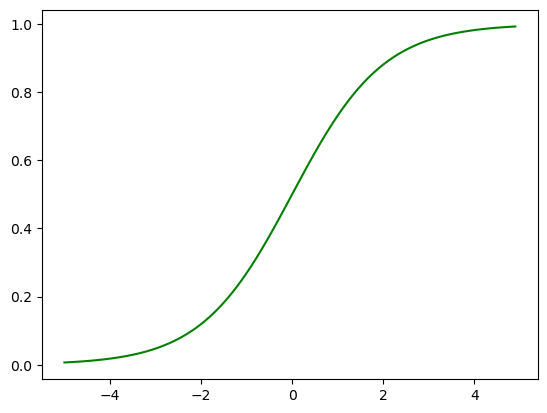

In [4]:
plt.plot(x,y,'g') #x,y를 그래프로 g는 green

In [5]:
y1=sigmoid(0.5*x)
y2=sigmoid(x)
y3=sigmoid(2*x)

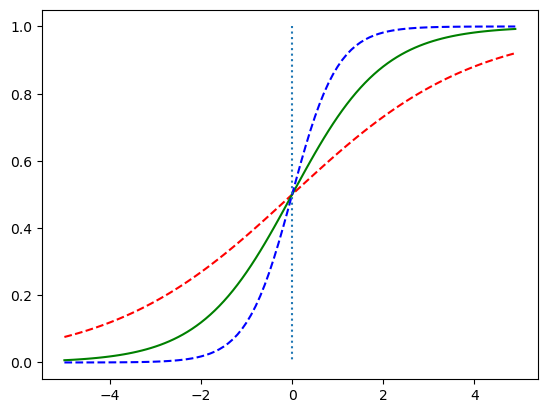

In [6]:
plt.plot(x, y1, 'r', linestyle='--' )
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0.0, 0.0], [1.0, 0.0], ':') #가운데 점선 추가 

#w값이 커질수록 경사가 커짐

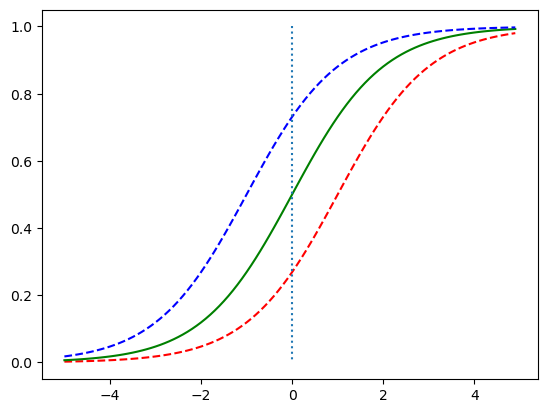

In [7]:
y1=sigmoid(x-1)
y2=sigmoid(x)
y3=sigmoid(x+1)

plt.plot(x, y1, 'r', linestyle='--' )
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0.0, 0.0], [1.0, 0.0], ':')

In [14]:
x_data = np.array([2,4,6,8,10,12,14,16,18,20]).reshape(10,1)
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(10,1)
w=np.random.rand(1,1)
b=np.random.rand(1)
print(w,b)

[[0.12947115]] [0.02702582]


In [15]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [19]:
def loss_func(x,t):
    delta=1e-7
    z=np.dot(x,w)+b
    y=sigmoid(z)
    return -np.sum(t*np.log(y+delta)+(1-t)*np.log((1-y)+delta))

In [24]:
def predict(x): # 모델학습 끝나고 predict를 만들어 줌
    z=np.dot(x,w) + b
    y=sigmoid(z)
    if y>0.5:
        result=1
    else: 
        result=0
    return y,result

In [25]:
def numerical_derivative(f,x):
    delta_x=1e-4
    grad=np.zeros_like(x)
    
    it=np.nditer(x,flags=['multi_index'],op_flags=['readwrite'])
    
    while not it.finished:
        idx=it.multi_index
        tmp_val=x[idx]
        x[idx]=float(tmp_val)+delta_x
        fx1=f(x)
        
        x[idx]=tmp_val-delta_x
        fx2=f(x)
        grad[idx]=(fx1-fx2)/(2*delta_x)
        
        x[idx]=tmp_val
        it.iternext()
        
    return grad

In [26]:
learning_rate=1e-2 # linear regressioion보다 작게 설정 -> 훈련을 더 많이 시키기 위해
f=lambda x: loss_func(x_data, t_data)
print("Initial error value=", loss_func(x_data, t_data), 'Initial w=', w,  'b=', b)

for step in range(30001):
    w-= learning_rate*numerical_derivative(f,w)
    b-= learning_rate*numerical_derivative(f,b)

    if step % 400 == 0:
        print("step=", step, "error value=", loss_func(x_data, t_data), 'w=', w, 'b=', b)

Initial error value= 0.1593889117946086 Initial w= [[2.5000173]] b= [-32.41613773]
step= 0 error value= 0.15938748743282574 w= [[2.50002645]] b= [-32.41625681]
step= 400 error value= 0.15881976419958627 w= [[2.50368145]] b= [-32.46380383]
step= 800 error value= 0.15825604510943542 w= [[2.50732354]] b= [-32.51118277]
step= 1200 error value= 0.15769628758040027 w= [[2.51095282]] b= [-32.55839484]
step= 1600 error value= 0.15714044964223223 w= [[2.51456937]] b= [-32.60544122]
step= 2000 error value= 0.15658848992520902 w= [[2.51817328]] b= [-32.65232307]
step= 2400 error value= 0.15604036764925425 w= [[2.52176465]] b= [-32.69904158]
step= 2800 error value= 0.155496042613239 w= [[2.52534356]] b= [-32.74559787]
step= 3200 error value= 0.15495547518451958 w= [[2.5289101]] b= [-32.79199309]
step= 3600 error value= 0.15441862628873865 w= [[2.53246436]] b= [-32.83822837]
step= 4000 error value= 0.15388545739984716 w= [[2.53600641]] b= [-32.8843048]
step= 4400 error value= 0.1533559305303243 w= 

In [27]:
predict(9) #결과 0 -> 0.5보다 작으므로 0으로 판단   

(array([[1.86084836e-05]]), 0)

In [28]:
predict(15) #결과 1 -> 0.5보다 크므로 1로 판단

(array([[0.99620142]]), 1)

파이토치

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [30]:
x_data1 = np.array([2,4,6,8,10,12,14,16,18,20]).reshape(10,1)
t_data1 = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(10,1)
x_train = torch.from_numpy(x_data1).float()
t_train = torch.from_numpy(t_data1).float()
print(x_train)
print(t_train)

tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.],
        [12.],
        [14.],
        [16.],
        [18.],
        [20.]])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])


In [32]:
w=torch.zeros((1,1), requires_grad=True)
b=torch.zeros(1, requires_grad=True)
print(w)
print(b)

tensor([[0.]], requires_grad=True)
tensor([0.], requires_grad=True)


In [33]:
optimizer = optim.SGD([w,b], lr=0.1)
epochs=1001

In [36]:
for epoch in range(epochs):
    z=x_train.matmul(w)+b #matmul은 행렬곱
    y=torch.sigmoid(z)
    cost=-(t_train*torch.log(y)+(1-t_train)*torch.log(1-y)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%100==0:
        print(epoch, cost.item(), w.item(), b.item()) 

0 0.16117726266384125 0.5010557770729065 -6.276482105255127
100 0.15538892149925232 0.5190743207931519 -6.516242027282715
200 0.15025773644447327 0.5360519289970398 -6.741994857788086
300 0.14566583931446075 0.5521240830421448 -6.955566883087158
400 0.14152270555496216 0.5674008131027222 -7.15844202041626
500 0.13775786757469177 0.5819724798202515 -7.351841449737549
600 0.13431555032730103 0.5959141850471497 -7.536776542663574
700 0.13115081191062927 0.6092894077301025 -7.714102745056152
800 0.12822706997394562 0.6221520304679871 -7.884548187255859
900 0.12551413476467133 0.6345483660697937 -8.048735618591309
1000 0.12298701703548431 0.6465182900428772 -8.20720386505127


In [39]:
x_test=torch.FloatTensor([[9],[15]])
y2=torch.sigmoid(x_test.matmul(w)+b)
result=y2>0.5
print(y2)
print(result.float())

tensor([[0.0841],
        [0.8162]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [1.]])


In [40]:
#모델 사용

torch.manual_seed(1)
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
print(x_train)
print(y_train)

tensor([[1., 2.],
        [2., 3.],
        [3., 1.],
        [4., 3.],
        [5., 3.],
        [6., 2.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [41]:
model=nn.Sequential(
    nn.Linear(2,1), #input_dim=2, output_dim=1
    nn.Sigmoid() #출력은 시그모이드 함수를 거친다
)

In [42]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True), Parameter containing:
tensor([-0.1371], requires_grad=True)]


In [43]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [44]:
optimizer=optim.SGD(model.parameters(), lr=0.1) #model.parameters()를 통해 w와 b를 전달
epochs=1001
costs=[] #손실 함수 값을 저장할 리스트
accuracys=[] #정확도를 저장할 리스트

In [46]:
for epoch in range(epochs):
    hypothesis=model(x_train)
    cost=F.binary_cross_entropy(hypothesis, y_train) #binary_cross_entropy는 시그모이드 함수를 사용하는 이진 분류에서 사용하는 손실 함수
    
    optimizer.zero_grad() #기울기 초기화
    cost.backward() #기울기 계산
    optimizer.step() #w와 b 업데이트

    costs.append(cost.item()) #손실 함수 값 저장
    pred=hypothesis>=torch.FloatTensor([0.5]) #예측값이 0.5보다 크면 True, 작으면 False
    correct_pred=pred.float()==y_train #예측값과 실제값이 일치하면 True, 아니면 False
    accuracy=correct_pred.sum().item()/len(correct_pred) #정확도 계산
    accuracys.append(accuracy) #정확도 저장

    if epoch%100==0:
        print(epoch, cost.item())

 


0 0.1464969366788864
100 0.13644739985466003
200 0.12770099937915802
300 0.12002295255661011
400 0.11323041468858719
500 0.10717941075563431
600 0.10175498574972153
700 0.0968647226691246
800 0.09243334084749222
900 0.08839879184961319
1000 0.08470990508794785


In [48]:
pred1=model(x_train)
result=pred1>0.5
print(pred1)
print(result.float())



tensor([[0.0090],
        [0.1104],
        [0.1715],
        [0.8513],
        [0.9749],
        [0.9924]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


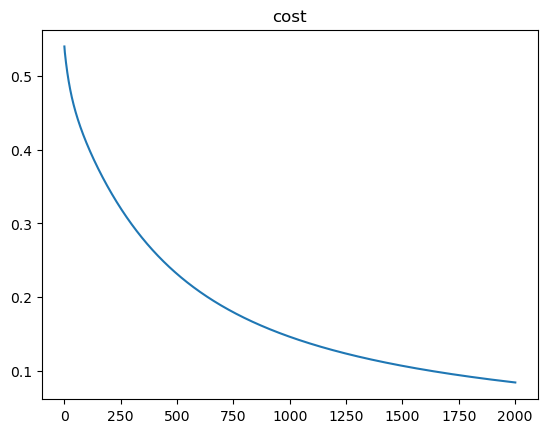

In [ ]:
import pandas as pd  
s1=pd.Series(costs)
plt.plot(s1)
plt.title('cost')
plt.show() # 함수안에 있는 그래프를 보여줌

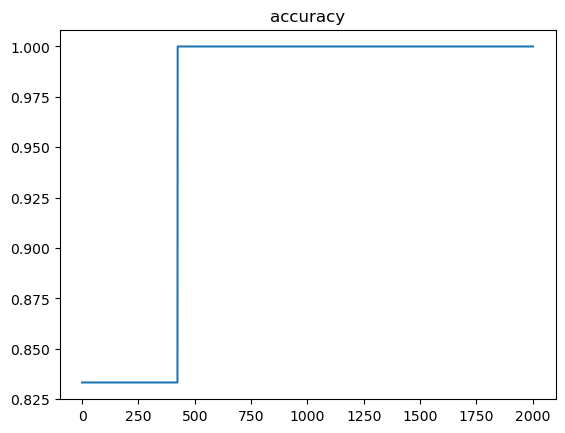

In [51]:
s2=pd.Series(accuracys)
plt.plot(s2)
plt.title('accuracy')
plt.show()

In [59]:
df=pd.read_csv('../data/data-01-test-score.csv', header=None) #데이터 불러오기
x_data=df.values[:,:-1] 
y_data=df.values[:,[-1]] # 모든 행의 마지막 열
x_train=torch.from_numpy(x_data).float()
y_train=torch.from_numpy(y_data).float().reshape(-1,1) #행렬곱을 위해 reshape
y_mean=torch.mean(y_train)
y_train=(y_train>y_mean).float() #평균보다 크면 1, 작으면 0으로 변환 
y_mean 
y_train

tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.]])

In [60]:
print(x_train)
print(y_train)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.],
        [ 53.,  46.,  55.],
        [ 69.,  74.,  77.],
        [ 47.,  56.,  60.],
        [ 87.,  79.,  90.],
        [ 79.,  70.,  88.],
        [ 69.,  70.,  73.],
        [ 70.,  65.,  74.],
        [ 93.,  95.,  91.],
        [ 79.,  80.,  73.],
        [ 70.,  73.,  78.],
        [ 93.,  89.,  96.],
        [ 78.,  75.,  68.],
        [ 81.,  90.,  93.],
        [ 88.,  92.,  86.],
        [ 78.,  83.,  77.],
        [ 82.,  86.,  90.],
        [ 86.,  82.,  89.],
        [ 78.,  83.,  85.],
        [ 76.,  83.,  71.],
        [ 96.,  93.,  95.]])
tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
     

In [80]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(2,1)
        self.sigmoid=nn.Sigmoid()

    def forward(self,x): 
        return self.sigmoid(self.linear(x)) #시그모이드 함수를 거친 값을 반환  

In [81]:
#모델 생성

model = BinaryClassifier()
print(list(model.parameters()))
optimizer=optim.SGD(model.parameters(), lr=0.01)

[Parameter containing:
tensor([[-0.0637,  0.1025]], requires_grad=True), Parameter containing:
tensor([-0.0028], requires_grad=True)]


In [83]:

epochs = 1001

costs = []
accuracys = []


In [ ]:
# 전체 데이터에 대한 예측


